In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from keras.utils import to_categorical, plot_model
import graphviz
import os

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

#0==fire
#1==Neutral

OneHotEncoder()

In [3]:
import os
from PIL import Image
import numpy as np
data = []
paths = []
result = []


# Specify valid image file extensions
valid_image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Collect paths of image files only
for r, d, files in os.walk(r'C:\Users\Aiswarya\Desktop\Detection_dataset\Train_data\Weapon'):
    for file in files:
        if file.lower().endswith(valid_image_extensions):
            paths.append(os.path.join(r, file))

# Now process only valid image files
for path in paths:
    try:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = np.array(img)
        if(img.shape == (128,128,3)):
            data.append(np.array(img))
            result.append(encoder.transform([[0]]).toarray())
    except Exception as e:
        print(f"Error opening {path}: {e}")


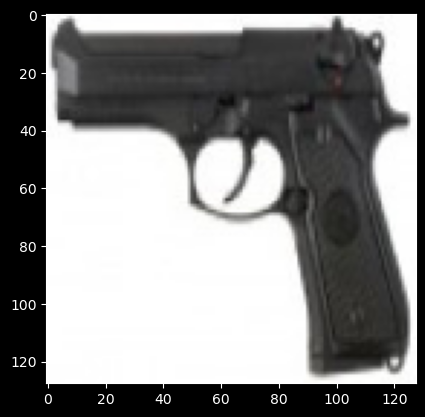

In [4]:
plt.imshow(data[8])

In [5]:
paths = []



# Specify valid image file extensions
valid_image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Collect paths of image files only
for r, d, files in os.walk(r'C:\Users\Aiswarya\Desktop\Detection_dataset\Train_data\Non_weapon'):
    for file in files:
        if file.lower().endswith(valid_image_extensions):
            paths.append(os.path.join(r, file))

# Now process only valid image files
for path in paths:
    try:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = np.array(img)
        if(img.shape == (128,128,3)):
            data.append(np.array(img))
            result.append(encoder.transform([[1]]).toarray())
    except Exception as e:
        print(f"Error opening {path}: {e}")

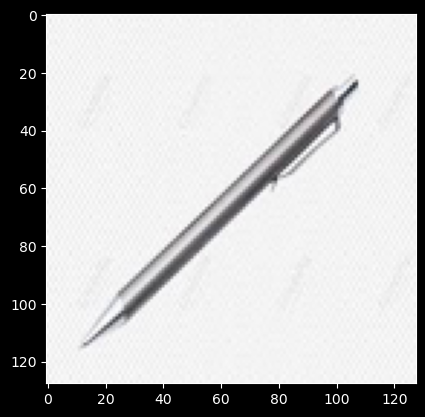

In [6]:
plt.imshow(data[1678])

In [7]:
data = np.array(data)
data.shape

(3148, 128, 128, 3)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=45)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [10]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [11]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
for layer in base_model.layers[15:]:  # Example: Fine-tune layers 15 onwards
    layer.trainable = True

In [13]:
import numpy as np

# Removing the extra dimension in your labels
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

print("New shape of y_train:", y_train.shape)
print("New shape of y_test:", y_test.shape)

New shape of y_train: (2518, 2)
New shape of y_test: (630, 2)


In [14]:
print(y_train.shape)  # Should be (batch_size, number_of_classes)
print(y_test.shape) 

(2518, 2)
(630, 2)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [16]:
import numpy as np

# Convert x_train and x_test to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Check the types and shapes again
print(f"type(x_train): {type(x_train)}")
print(f"x_train shape: {x_train.shape}")
print(f"type(y_train): {type(y_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"type(x_test): {type(x_test)}")
print(f"x_test shape: {x_test.shape}")
print(f"type(y_test): {type(y_test)}")
print(f"y_test shape: {y_test.shape}")


type(x_train): <class 'numpy.ndarray'>
x_train shape: (2518, 128, 128, 3)
type(y_train): <class 'numpy.ndarray'>
y_train shape: (2518, 2)
type(x_test): <class 'numpy.ndarray'>
x_test shape: (630, 128, 128, 3)
type(y_test): <class 'numpy.ndarray'>
y_test shape: (630, 2)


In [ ]:
# history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, verbose = 1,validation_data = (x_test, y_test))
import numpy as np

# Ensure the shape of y_train and y_test is (batch_size, num_classes)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/10
22/40 ━━━━━━━━━━━━━━━━━━━━ 4:56 16s/step - accuracy: 0.6748 - loss: 1.7109

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

In [ ]:
#Step 8: Save the Model
model.save('weapon_detection.keras')

In [ ]:
model.save('weapon_detection.h5')

In [ ]:
def names(number):
    if number==0:
        return 'weapon'
    else:
        return 'non-weapon'

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('my_model_cnn.keras')

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Aiswarya\Desktop\MainProject\deeplearning\OIP (24).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
from matplotlib.pyplot import imshow
#img = Image.open(r"C:\Users\Aiswarya\Desktop\MainProject\deeplearning\OIP (4).jpg")
img = Image.open(r"C:\Users\Aiswarya\Desktop\MainProject\deeplearning\61RJztxyp9L.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))